### Seqfish-plus dataset
Thanks to David, we also got 2 seqfish plus datasets. These are mostly useful for the spatial-graph challenge. You can find more about the datasets in this [paper](https://www.nature.com/articles/s41586-019-1049-y)

I've quickly made a loading function to store the data as anndata object.

There are 2 datasets: olfactory bulb *(ob)* and brain sub-ventricular zone *(svz)*.

In [1]:
import os
import scanpy as sc
import pandas as pd
from spatial_tools import read_seqfish

%load_ext autoreload
%autoreload 2
%load_ext lab_black

# path to "raw" dataset folder
BASE_PATH = "/storage/groups/ml01/datasets/raw/20200909_PublicVisium_giovanni.palla/2020_seqFISH-plus_giovanni.palla"

In [2]:
adata_ob = read_seqfish(BASE_PATH, "ob")
adata_svz = read_seqfish(BASE_PATH, "svz")
adata_ob

/home/icb/giovanni.palla/miniconda3/envs/spatools/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2050 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y'
    obsm: 'spatial'

/home/icb/giovanni.palla/miniconda3/envs/spatools/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Region' as categorical


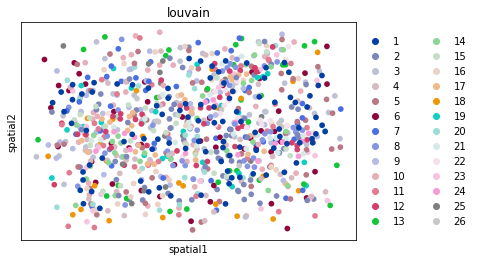

In [3]:
sc.pl.embedding(adata_svz, basis="spatial", color="louvain")

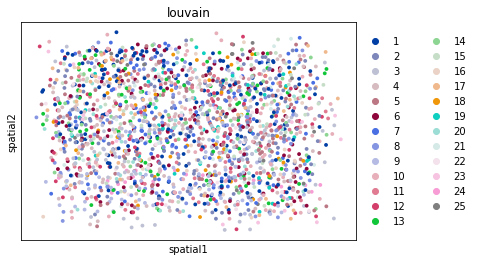

In [4]:
sc.pl.embedding(adata_ob, basis="spatial", color="louvain")

I think that the key is to visualize the cells by **Field of View**. For some FOV you can clearly see structure, which does not seem to exist if we plot the full dataset.

/home/icb/giovanni.palla/miniconda3/envs/spatools/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


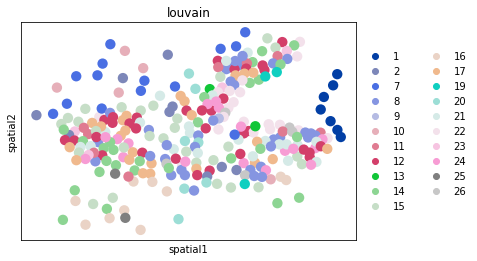

In [11]:
sc.pl.embedding(
    adata_svz[adata_svz.obs["Field of View"] == 5], basis="spatial", color="louvain"
)

/home/icb/giovanni.palla/miniconda3/envs/spatools/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


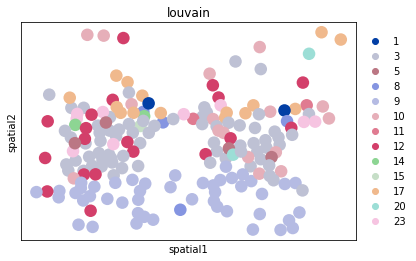

In [5]:
sc.pl.embedding(
    adata_ob[adata_ob.obs["Field of View"] == 6], basis="spatial", color="louvain"
)

I might be wrong though, need to investigate further